<a href="https://colab.research.google.com/github/AnniaBenitez/Cores_MOD3_AML/blob/main/CORE5_curtomer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Archivos en la carpeta:", files)
path = os.path.join(path, files[0])
print("Path to dataset file:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1
Archivos en la carpeta: ['Mall_Customers.csv']
Path to dataset file: /root/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv


In [8]:
# Cargar datos
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Primeras filas de las variables seleccionadas:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


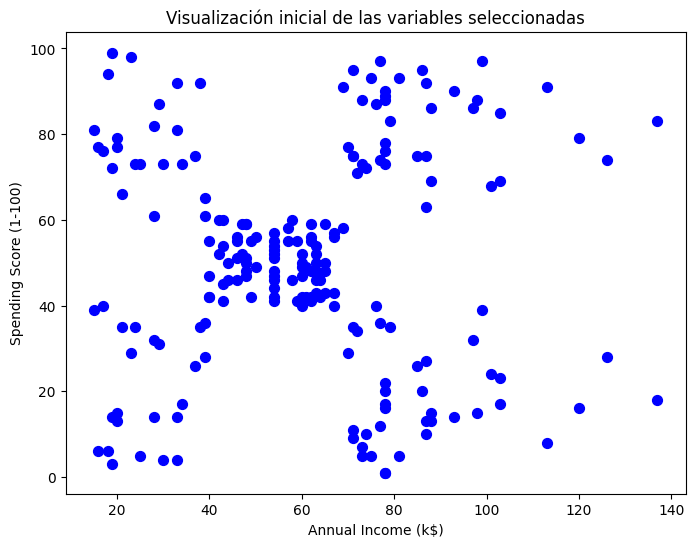

In [10]:
# Selección de variables
variables = ['Annual Income (k$)', 'Spending Score (1-100)']
selected_data = df[variables]

# Visualizar las primeras filas de las variables seleccionadas
print("Primeras filas de las variables seleccionadas:")
print(selected_data.head())

# Visualización inicial de los datos seleccionados
plt.figure(figsize=(8, 6))
plt.scatter(selected_data['Annual Income (k$)'], selected_data['Spending Score (1-100)'], c='blue', s=50)
plt.title("Visualización inicial de las variables seleccionadas")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

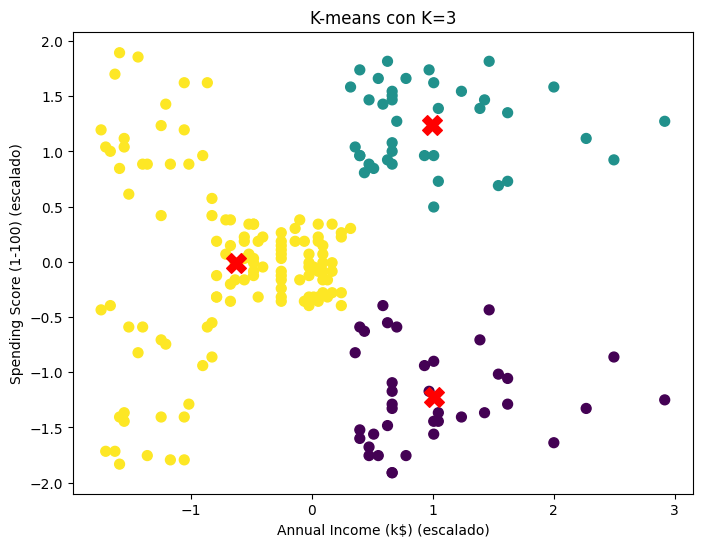

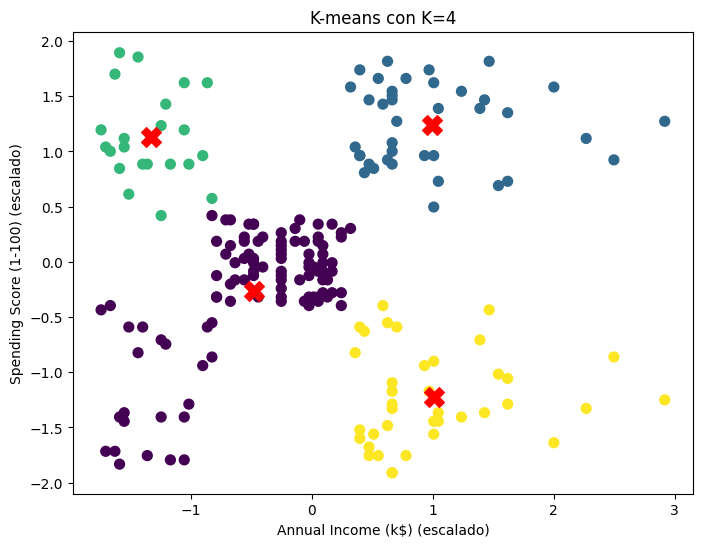

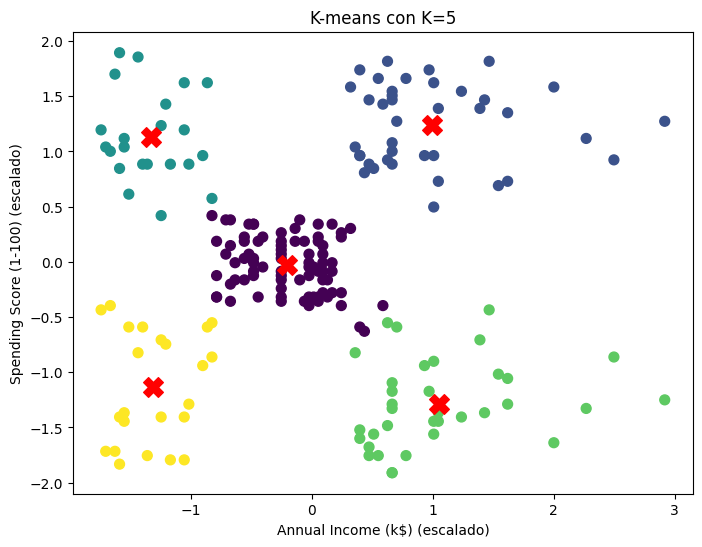

In [13]:
# Escalar los datos (opcional pero recomendado para K-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

# Aplicar K-means para diferentes valores de K
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Visualizar los clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')  # Centroides
    plt.title(f"K-means con K={k}")
    plt.xlabel("Annual Income (k$) (escalado)")
    plt.ylabel("Spending Score (1-100) (escalado)")
    plt.show()


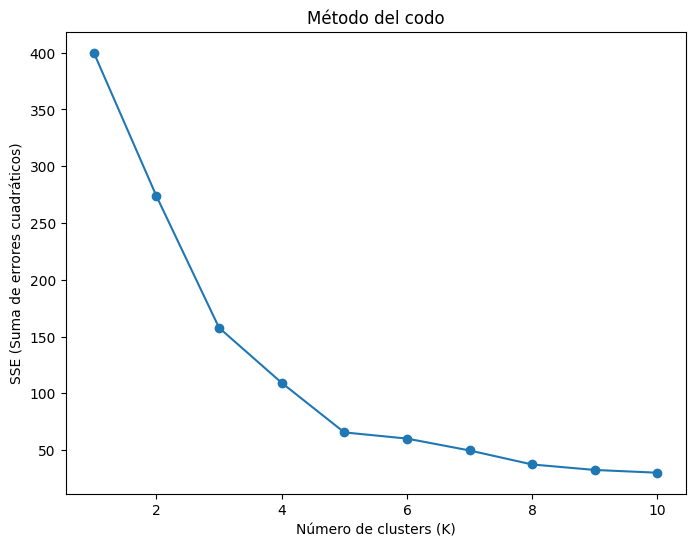

In [14]:
# Calcular SSE para diferentes valores de K
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # SSE

# Visualizar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("SSE (Suma de errores cuadráticos)")
plt.show()

5. Interpretación de Clusters

Basándonos en los resultados de los gráficos y el método del codo:

Clusterización y características comunes:

Los clientes en cada cluster tienen comportamientos o características distintas relacionadas con su ingreso anual y su nivel de gasto.

Ejemplo de patrones observados:

Cluster 1: Clientes con ingreso bajo y nivel de gasto bajo. Pueden ser más sensibles al precio y adecuados para campañas de descuento.

Cluster 2: Clientes con ingreso bajo y nivel de gasto alto. Representan un grupo valioso para estrategias que promuevan recompensas de lealtad.

Cluster 3: Clientes con ingreso alto y nivel de gasto bajo. Podrían necesitar incentivos para aumentar su participación en las compras.

Cluster 4: Clientes con ingreso alto y nivel de gasto alto. Este grupo representa a los clientes "premium" que son más receptivos a productos de lujo o personalizados.

Cluster 5: Un mix intermedio de clientes con ingresos y gastos en rangos moderados.

Estrategias de marketing personalizadas:

Ofrecer descuentos en productos básicos para los clusters con ingreso y gasto bajo.

Incentivar la compra de productos premium para los clientes en clusters con alto ingreso y gasto.

Diseñar programas de lealtad para clusters que gastan más, sin importar su ingreso anual.


6. Análisis de Resultados

Los resultados obtenidos de los clusters proporcionan valiosos insights:

Patrones identificados:

Existe una clara segmentación entre clientes que gastan poco y mucho, lo que refleja diferentes niveles de compromiso con la marca o el servicio.
La relación entre ingreso y gasto no es completamente lineal; algunos clientes con bajos ingresos aún tienen un gasto alto, posiblemente debido a preferencias de compra específicas.

Posibles aplicaciones:

Segmentar a los clientes para campañas de marketing dirigidas, como promociones específicas o recomendaciones personalizadas.
Identificar grupos de clientes que puedan requerir atención especial, como los de alto gasto con bajo ingreso (potencialmente sensibles al precio).
Optimizar recursos en función de los comportamientos observados, priorizando a los clientes de alto valor.
